# KNN way of solving

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
X = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [3]:
#establish KNN model
#unlike Kmeans, KNN is a supervised learning algorithm so we need to give the answer for the label
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [6]:
#predict V=80,V2=60
y_predict_knn_test = KNN.predict([[80,60]])
print(y_predict_knn_test)
#correct

[2]


# Meanshift (unsupervised learning)version

In [9]:
from sklearn.cluster import MeanShift,estimate_bandwidth
bw = estimate_bandwidth(X,n_samples = 500)
print(bw)

30.84663454820215


In [10]:
#establish the meanshift model-unsupervised
ms = MeanShift(bandwidth = bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [12]:
#check the model
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms))
print(pd.value_counts(y))
#label is wrong, pattern is matched

0    1149
1     952
2     899
dtype: int64
2    1156
1     954
0     890
Name: labels, dtype: int64


In [13]:
#correction
y_correct = []
for i in y_predict_ms:
    if i ==0:
        y_correct.append(2)
    elif i == 1:
        y_correct.append(1)
    else:
        y_correct.append(0)

In [16]:
#convert data structure
y_correct = np.array(y_correct)

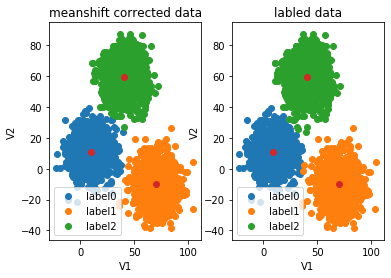

In [25]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)
centers = KM.cluster_centers_

fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_correct==0],X.loc[:,'V2'][y_correct==0])
label1 = plt.scatter(X.loc[:,'V1'][y_correct==1],X.loc[:,'V2'][y_correct==1])
label2 = plt.scatter(X.loc[:,'V1'][y_correct==2],X.loc[:,'V2'][y_correct==2])

plt.title("meanshift corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()